<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/Cluster_membership_RF_Classifier_NGC884_and_NGC_869.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages

In [0]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

### Import and Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import binary_cluster dataset
member = pd.read_csv('https://raw.githubusercontent.com/mahmud-nobe/Cluster-Membership/master/binary_cluster.csv')
member.head(5)

RA_ICRS    DE_ICRS              Source  ...  Cluster   _RA.icrs   _DE.icrs
0  34.900785  57.115651  458374066782242688  ...  NGC_869  34.900792  57.115658
1  34.744249  57.136588  458377640195025664  ...  NGC_869  34.744252  57.136592
2  34.694726  57.068887  458368603583938816  ...  NGC_869  34.694727  57.068890
3  35.115957  57.116405  458363101717259648  ...  NGC_869  35.115961  57.116410
4  34.685825  57.024972  458368019468438144  ...  NGC_869  34.685832  57.024975

[5 rows x 15 columns]

In [0]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

RA_ICRS      DE_ICRS  ...     _RA.icrs     _DE.icrs
count  2529.000000  2529.000000  ...  2529.000000  2529.000000
mean     35.150624    57.139672  ...    35.150629    57.139676
std       0.495088     0.112939  ...     0.495088     0.112939
min      34.357227    56.821045  ...    34.357234    56.821049
25%      34.721340    57.071251  ...    34.721345    57.071252
50%      34.980025    57.140006  ...    34.980036    57.140010
75%      35.586616    57.208628  ...    35.586620    57.208634
max      36.154135    57.449600  ...    36.154139    57.449604

[8 rows x 14 columns]

In [0]:
field_star = member['PMemb'] < 0.5
member['Cluster'][field_star] = 'Field'
member['Cluster'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count      2529
unique        3
top       Field
freq        988
Name: Cluster, dtype: object

In [0]:
# correlation of PMemb with other variables
member.corr().PMemb

RA_ICRS    -0.118721
DE_ICRS     0.033287
Source     -0.023766
GLON       -0.122076
GLAT       -0.053463
plx         0.130511
pmRA       -0.075814
pmDE       -0.154012
o_Gmag     -0.062412
Gmag       -0.347099
BP-RP      -0.426172
PMemb       1.000000
_RA.icrs   -0.118721
_DE.icrs    0.033289
Name: PMemb, dtype: float64

In [0]:
# Profile report of the full dataset
pd_prof.ProfileReport(member)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
# Dropping the NULL values
member = member.dropna()
member.describe()

RA_ICRS      DE_ICRS  ...     _RA.icrs     _DE.icrs
count  2508.000000  2508.000000  ...  2508.000000  2508.000000
mean     35.150426    57.139659  ...    35.150431    57.139663
std       0.495617     0.113090  ...     0.495616     0.113090
min      34.357227    56.821045  ...    34.357234    56.821049
25%      34.720499    57.071125  ...    34.720506    57.071130
50%      34.979644    57.139874  ...    34.979648    57.139878
75%      35.586815    57.208642  ...    35.586819    57.208647
max      36.154135    57.449600  ...    36.154139    57.449604

[8 rows x 14 columns]

In [0]:
# Choosing the predictors
features = member.loc[:,['RA_ICRS', 'DE_ICRS', 'plx',
                         'pmRA', 'pmDE', 
                         'Gmag', 'BP-RP']]
features

RA_ICRS    DE_ICRS     plx   pmRA   pmDE       Gmag     BP-RP
0     34.900785  57.115651  0.2806 -0.954 -1.506  17.506157  1.636337
1     34.744249  57.136588  0.4154 -0.343 -0.756  11.031491  0.490269
2     34.694726  57.068887  0.3446 -0.146 -0.699  15.567855  1.153742
3     35.115957  57.116405  0.3664 -0.502 -1.183  16.595991  1.484625
4     34.685825  57.024972  0.3748 -0.932 -0.711  15.888404  1.257902
...         ...        ...     ...    ...    ...        ...       ...
2524  35.475146  57.108823  0.4078 -0.069 -1.517  17.955290  1.558842
2525  35.820625  57.127543  0.4018 -0.490 -0.933  15.145645  0.795093
2526  35.504081  57.113965  0.3138 -1.096 -0.913  16.569098  1.390498
2527  35.875661  57.121199  0.4552 -0.395 -0.938  15.643492  0.929671
2528  35.547000  57.109317  0.4296 -0.564 -0.921  13.838141  0.576590

[2508 rows x 7 columns]

In [0]:
# Descriptive stats
features.describe()

RA_ICRS      DE_ICRS  ...         Gmag        BP-RP
count  2508.000000  2508.000000  ...  2508.000000  2508.000000
mean     35.150426    57.139659  ...    15.171654     1.021516
std       0.495617     0.113090  ...     1.827229     0.360290
min      34.357227    56.821045  ...     6.210630     0.276914
25%      34.720499    57.071125  ...    14.240149     0.721106
50%      34.979644    57.139874  ...    15.507572     0.986889
75%      35.586815    57.208642  ...    16.458579     1.301018
max      36.154135    57.449600  ...    17.998775     2.581698

[8 rows x 7 columns]

In [0]:
# The outcome that we want to use to train our model
targets = member['Cluster']
targets

0         Field
1         Field
2         Field
3       NGC_869
4         Field
         ...   
2524      Field
2525    NGC_884
2526      Field
2527      Field
2528    NGC_884
Name: Cluster, Length: 2508, dtype: object

In [0]:
# Probable members (PMemb >= 0.5) in this dataset
len(member[member['Cluster'] != 'Field'])

1534

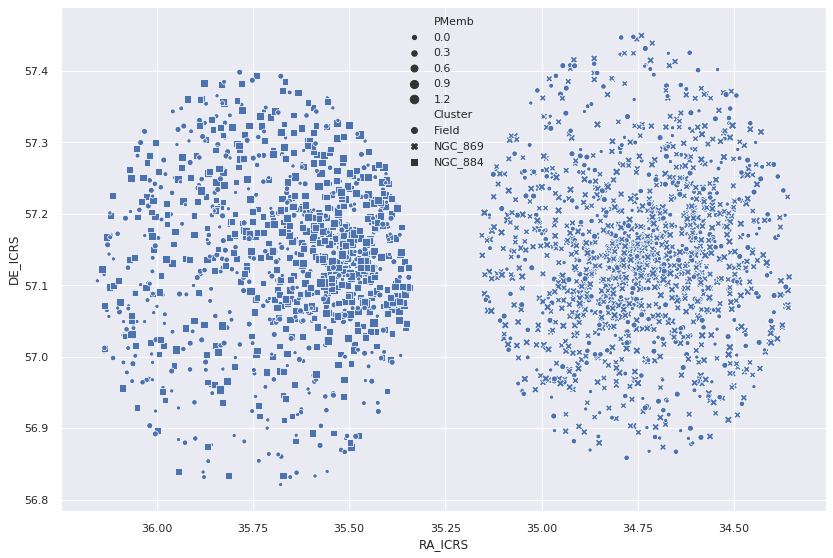

In [0]:
sns.set(rc={'figure.figsize':(13.7,9.27)})

skyplot = sns.scatterplot(member['RA_ICRS'], member['DE_ICRS'], style=member['Cluster'], palette='Greens', size = member['PMemb'])
skyplot.invert_xaxis()

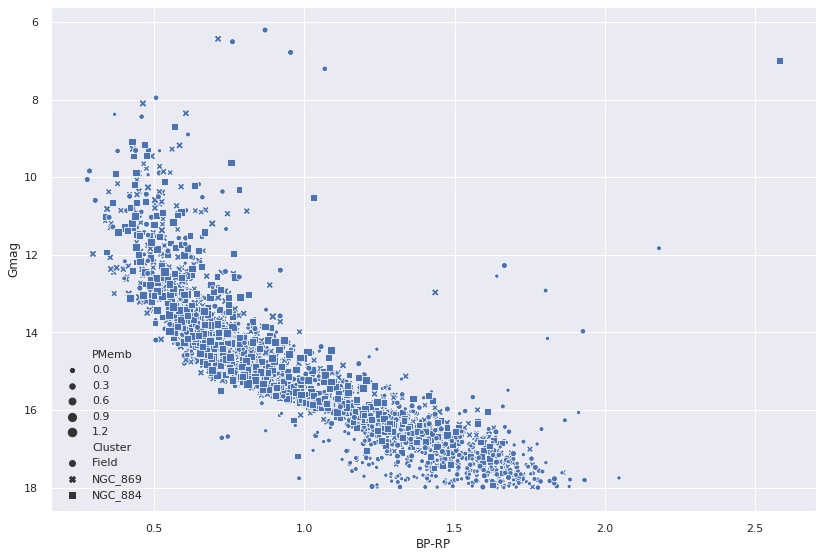

In [0]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)

cmd = sns.scatterplot(member['BP-RP'], member['Gmag'], style=member['Cluster'], palette='Greens', size = member['PMemb'])
cmd.invert_yaxis()

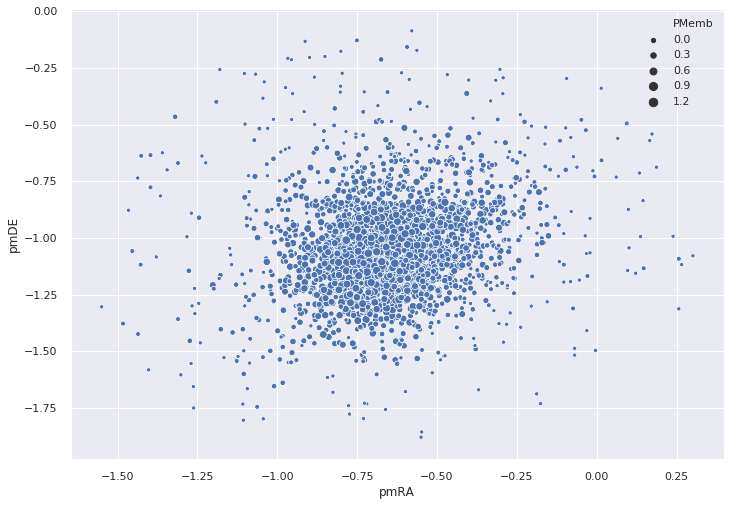

In [0]:
# proper motion plot marked with the membership probabilities of the stars 

sns.set(rc={'figure.figsize':(11.7,8.27)})
pm_plot = sns.scatterplot(member['pmRA'], member['pmDE'], size = member['PMemb'])

In [0]:
# data type of each variable
member.dtypes

RA_ICRS     float64
DE_ICRS     float64
Source        int64
GLON        float64
GLAT        float64
plx         float64
pmRA        float64
pmDE        float64
o_Gmag        int64
Gmag        float64
BP-RP       float64
PMemb       float64
Cluster      object
_RA.icrs    float64
_DE.icrs    float64
dtype: object

In [0]:
type(targets)
targets.dtypes
targets.isna().sum()

0

In [0]:
# changing the data type to 32-bit-float number as the built-in radom forest package 
# don't take 64-bit-float
from numpy import float32
features = features.astype('float32')
# targets = targets.astype('float32')
features.dtypes

RA_ICRS    float32
DE_ICRS    float32
plx        float32
pmRA       float32
pmDE       float32
Gmag       float32
BP-RP      float32
dtype: object

In [0]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

NotFittedError: ignored

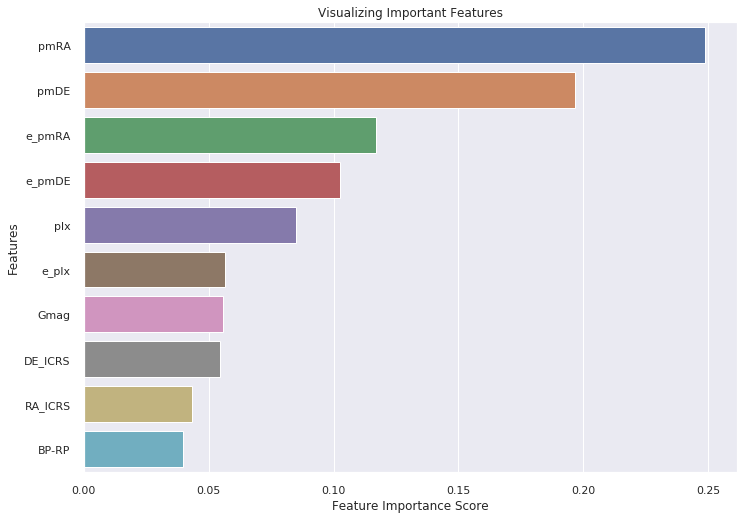

In [0]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [0]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.5539702580880618

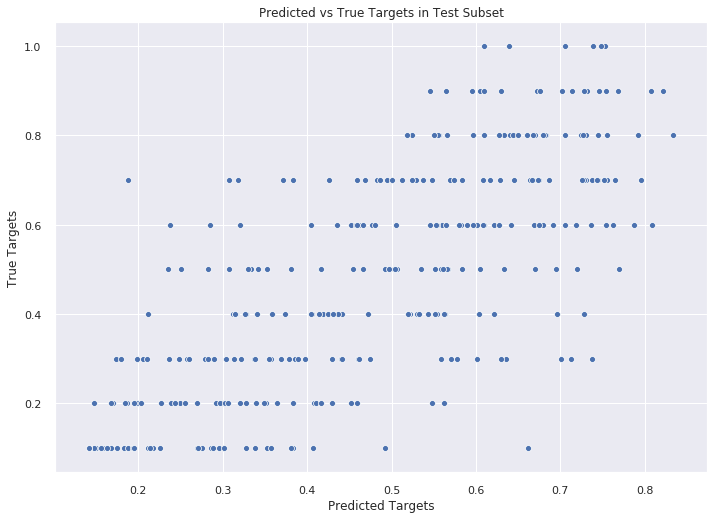

In [0]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [0]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [0]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

for ratio in test_ratio:
  test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

  # train the model using only training subset
  rfr.fit(train_features, train_targets)

  # find the accuracy rate to predict the outcome for test subset
  test_predict = rfr.predict(test_features)
  accuracy = rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy)

print(accuracy_rate)

[0.17997421328779817, 0.3574074270072607, 0.5017377166808488, 0.5318858994757576, 0.5459571818762152, 0.5485367957743879, 0.5607939997943714, 0.5944322935535977, 0.5517812234159423, 0.5656988924132628, 0.552480835028922, 0.5423754150773297, 0.5961359617768149, 0.5861648129449952, 0.6095270384372491, 0.5505344084230284, 0.6507231205864609, 0.5535133723142174, 0.6438806447488483]


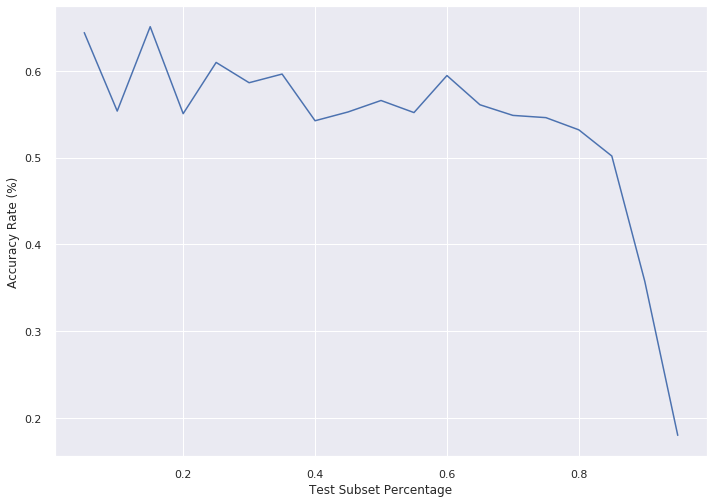

In [0]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [0]:
# Import all the stars from GAIA data around 30 m radius of cluster center
all_stars = pd.read_csv('https://raw.githubusercontent.com/mahmud-nobe/Cluster-Membership/master/n884_dr2_30m.csv')
all_stars

RA_ICRS  e_RA_ICRS    DE_ICRS  e_DE_ICRS  ...   AG  E_BP-RP_  Rad  Lum
0      36.075478     0.3115  56.701750     0.4030  ...  0.0       0.0  0.0  0.0
1      36.081223     0.0804  56.702640     0.1013  ...  0.0       0.0  0.0  0.0
2      36.103756     0.1390  56.725204     0.1739  ...  0.0       0.0  0.0  0.0
3      36.101254     0.2235  56.731873     0.2823  ...  0.0       0.0  0.0  0.0
4      36.089980     0.1390  56.715750     0.1844  ...  0.0       0.0  0.0  0.0
...          ...        ...        ...        ...  ...  ...       ...  ...  ...
53035  35.478000     0.3377  57.606170     0.4042  ...  0.0       0.0  0.0  0.0
53036  35.475624     0.2272  57.609074     0.2456  ...  0.0       0.0  0.0  0.0
53037  35.506540     0.4131  57.621720     0.4285  ...  0.0       0.0  0.0  0.0
53038  35.447350     0.0539  57.618378     0.0631  ...  0.0       0.0  0.0  0.0
53039   0.000000     0.0000   0.000000     0.0000  ...  0.0       0.0  0.0  0.0

[53040 rows x 33 columns]

In [0]:
# checking the data types
all_stars.dtypes

RA_ICRS      float64
e_RA_ICRS    float64
DE_ICRS      float64
e_DE_ICRS    float64
Source         int64
Plx          float64
e_Plx        float64
RPlx         float64
pmRA         float64
e_pmRA       float64
pmDE         float64
e_pmDE       float64
Dup            int64
FG           float64
e_FG         float64
Gmag         float64
e_Gmag       float64
FBP          float64
e_FBP        float64
BPmag        float64
e_BPmag      float64
FRP          float64
e_FRP        float64
RPmag        float64
e_RPmag      float64
BP-RP        float64
RV           float64
e_RV         float64
Teff         float64
AG           float64
E_BP-RP_     float64
Rad          float64
Lum          float64
dtype: object

In [0]:
# descriptive stats
all_stars.describe()

RA_ICRS     e_RA_ICRS  ...           Rad           Lum
count  53040.000000  53040.000000  ...  53040.000000  53040.000000
mean      35.576922      0.684876  ...      0.299151      4.553934
std        0.487399      1.677188  ...      3.693827    194.794245
min        0.000000      0.000000  ...      0.000000      0.000000
25%       35.211562      0.096000  ...      0.000000      0.000000
50%       35.570442      0.254400  ...      0.000000      0.000000
75%       35.946352      0.568900  ...      0.000000      0.000000
max       36.516582     68.333000  ...    445.140000  21300.008000

[8 rows x 33 columns]

In [0]:
# change to 32-bit-float
all_stars = all_stars.astype('float32')

In [0]:
# checking the name of all columns in this dataset and the previous dataset to compare
member.columns

Index(['RA_ICRS', 'DE_ICRS', 'Source', 'GLON', 'GLAT', 'plx', 'pmRA', 'pmDE',
       'o_Gmag', 'Gmag', 'BP-RP', 'PMemb', 'Cluster', '_RA.icrs', '_DE.icrs'],
      dtype='object')

In [0]:
all_stars.columns

Index(['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx',
       'e_Plx', 'RPlx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'FG',
       'e_FG', 'Gmag', 'e_Gmag', 'FBP', 'e_FBP', 'BPmag', 'e_BPmag', 'FRP',
       'e_FRP', 'RPmag', 'e_RPmag', 'BP-RP', 'RV', 'e_RV', 'Teff', 'AG',
       'E_BP-RP_', 'Rad', 'Lum'],
      dtype='object')

In [0]:
# Renaming necessary columns as the name of the previous dataset
all_stars = all_stars.rename(columns={'Plx': 'plx', 'e_Plx': 'e_plx'})
all_stars.columns

Index(['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'plx',
       'e_plx', 'RPlx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'FG',
       'e_FG', 'Gmag', 'e_Gmag', 'FBP', 'e_FBP', 'BPmag', 'e_BPmag', 'FRP',
       'e_FRP', 'RPmag', 'e_RPmag', 'BP-RP', 'RV', 'e_RV', 'Teff', 'AG',
       'E_BP-RP_', 'Rad', 'Lum'],
      dtype='object')

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:,['RA_ICRS', 'e_RA_ICRS', 'plx',
                                 'pmRA', 'pmDE', 
                                 'Gmag', 'BP-RP']]

In [0]:
# train the model again using all the features and targets of the previous dataset
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# extimate the membership probability of the stars
all_stars['Cluster'] = rfc.predict(new_features)

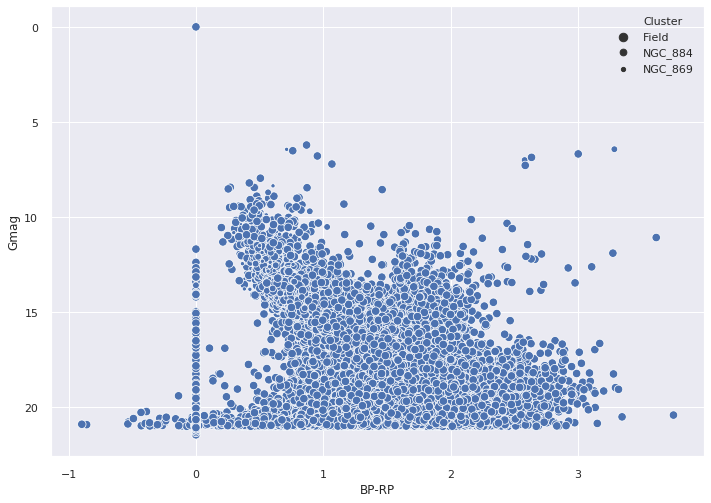

In [0]:
# CMD using all the stars where the membership Probability are expressed as the size of the dots

sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd = sns.scatterplot(all_stars['BP-RP'], all_stars['Gmag'], size = all_stars['Cluster'])
cmd.invert_yaxis()

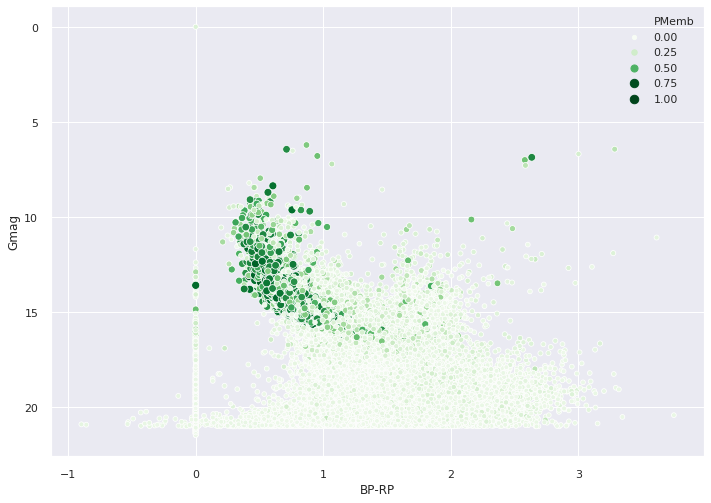

In [0]:
# CMD using all the stars where the membership Probability are expressed as colors

sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd = sns.scatterplot(all_stars['BP-RP'], all_stars['Gmag'], hue=all_stars['PMemb'], palette='Greens', size = all_stars['PMemb'])
cmd.invert_yaxis()

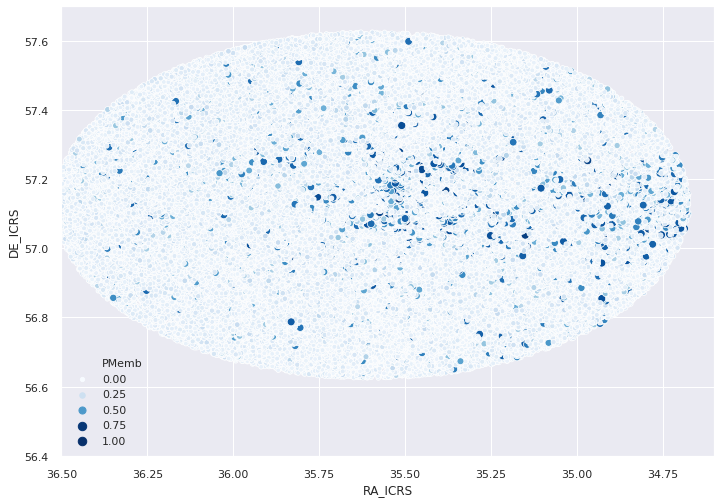

In [0]:
skyplot = sns.scatterplot(all_stars['RA_ICRS'], all_stars['DE_ICRS'], hue=all_stars['PMemb'], palette='Blues', size = all_stars['PMemb'])
plt.ylim(56.4,57.7)
plt.xlim(34.6,36.5)
skyplot.invert_xaxis()

In [0]:
# define the subset of the probable members
potentialMember = all_stars[all_stars['Cluster'] != 'Field']
len(potentialMember)

1349

In [0]:
# comparing the descriptive stats of the all stars vs the probable members
all_stars.describe()

RA_ICRS     e_RA_ICRS  ...           Rad           Lum
count  53040.000000  53040.000000  ...  53040.000000  53040.000000
mean      35.577007      0.684874  ...      0.299151      4.553935
std        0.487397      1.677180  ...      3.693022    194.760483
min        0.000000      0.000000  ...      0.000000      0.000000
25%       35.211562      0.096000  ...      0.000000      0.000000
50%       35.570442      0.254400  ...      0.000000      0.000000
75%       35.946352      0.568900  ...      0.000000      0.000000
max       36.516582     68.333000  ...    445.140015  21300.007812

[8 rows x 33 columns]

In [0]:
potentialMember.describe()

RA_ICRS    e_RA_ICRS  ...           Lum        PMemb
count  1219.000000  1219.000000  ...   1219.000000  1219.000000
mean     35.349251     0.023502  ...     57.357056     0.602311
std       0.424367     0.006286  ...    595.159546     0.058846
min      34.676834     0.012500  ...      0.000000     0.500000
25%      34.953375     0.018300  ...      2.514000     0.553000
50%      35.379745     0.022800  ...      5.670000     0.603000
75%      35.608358     0.027800  ...     15.275500     0.648000
max      36.483715     0.047400  ...  16623.664062     0.769000

[8 rows x 34 columns]

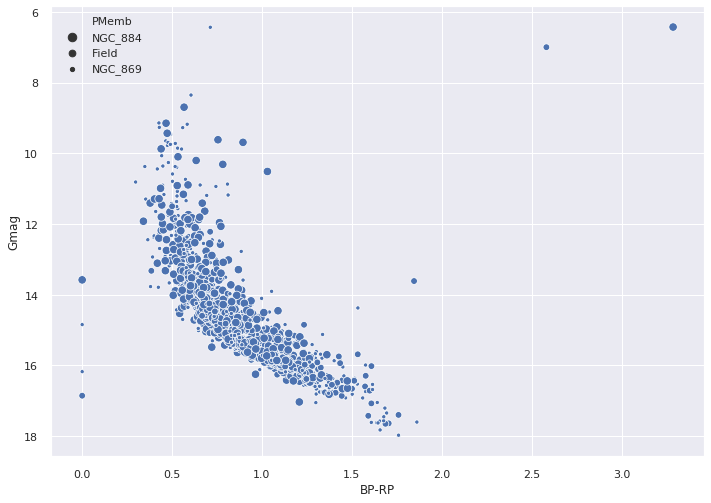

In [0]:
# CMD of only probable members 

sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd2 = sns.scatterplot(potentialMember['BP-RP'], potentialMember['Gmag'], size = potentialMember['PMemb'])
# plt.ylim(5,18)
cmd2.invert_yaxis()



### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['Cluster'] != 'Field']


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [0]:
concatenated

AG     BP-RP      BPmag  Cluster  ... o_Gmag     plx   pmDE   pmRA
597   0.0000  0.772000  14.750800  NGC_884  ...    NaN  0.3884 -1.185 -0.742
710   0.0000  0.817300  15.414500  NGC_884  ...    NaN  0.4162 -1.076 -0.664
1802  1.0960  1.072900  16.528601  NGC_884  ...    NaN  0.4378 -0.867 -0.502
1990  0.8003  0.384700  13.450600  NGC_884  ...    NaN  0.5046 -1.281 -0.709
2050  0.0000  1.041800  16.212099  NGC_884  ...    NaN  0.5114 -1.026 -0.503
...      ...       ...        ...      ...  ...    ...     ...    ...    ...
2519     NaN  0.948518        NaN  NGC_884  ...  251.0  0.3990 -1.061 -0.689
2520     NaN  0.902059        NaN  NGC_884  ...  273.0  0.3691 -0.999 -0.640
2521     NaN  1.026316        NaN  NGC_884  ...  268.0  0.4372 -0.948 -0.515
2525     NaN  0.795093        NaN  NGC_884  ...  255.0  0.4018 -0.933 -0.490
2528     NaN  0.576590        NaN  NGC_884  ...  252.0  0.4296 -0.921 -0.564

[2883 rows x 42 columns]

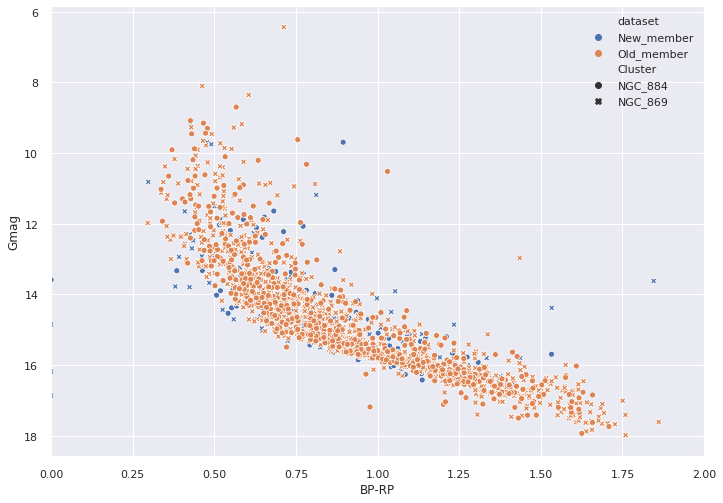

In [0]:
cmd = sns.scatterplot(x='BP-RP', y='Gmag', data=concatenated,
                style='Cluster', hue='dataset')
plt.xlim(0,2)
cmd.invert_yaxis()

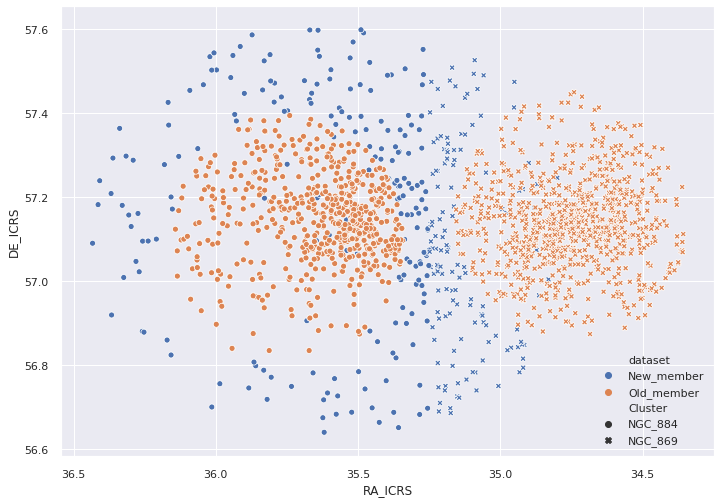

In [0]:
skyplot = sns.scatterplot(x='RA_ICRS', y='DE_ICRS', data=concatenated,
                style='Cluster', hue='dataset')
skyplot.invert_xaxis()

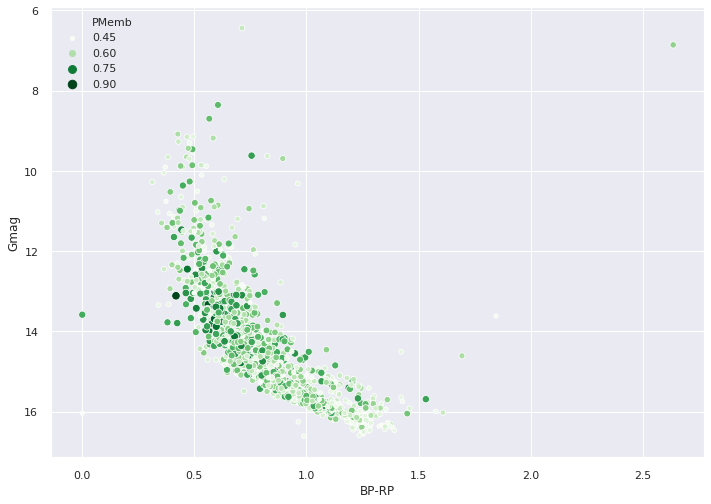

In [0]:
a# CMD
sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd2 = sns.scatterplot(potentialMember['BP-RP'], potentialMember['Gmag'], hue=potentialMember['PMemb'], palette='Greens', size = potentialMember['PMemb'])
# plt.ylim(5,18)
cmd2.invert_yaxis()

In [0]:
all_stars.to_csv('n884_membership_prob.csv')

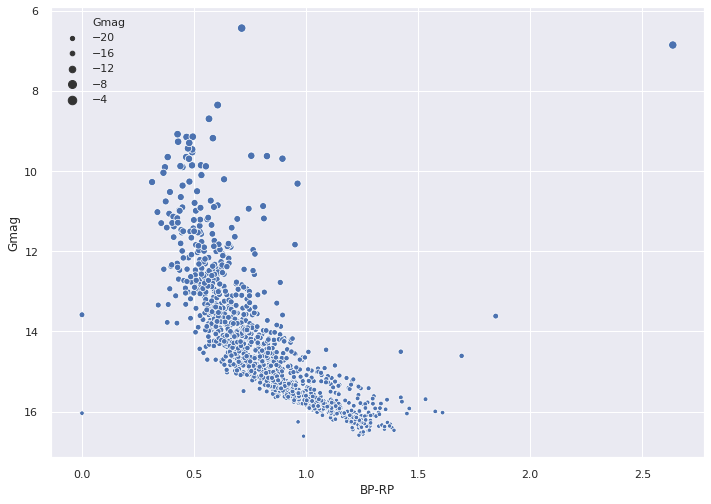

In [0]:
# CMD
sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd2 = sns.scatterplot(potentialMember['BP-RP'], potentialMember['Gmag'], size = -1*potentialMember['Gmag'])
# plt.ylim(5,18)
cmd2.invert_yaxis()

In [0]:
a = np.array([2,2,3,3,3,5,6,4])
list(set(a))

[2, 3, 4, 5, 6]

In [0]:
pd_prof.ProfileReport(all_stars)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


(array([2.8767e+04, 2.0455e+04, 1.4880e+03, 5.5400e+02, 3.5000e+02,
        3.3000e+02, 3.7900e+02, 4.3100e+02, 2.6200e+02, 2.4000e+01]),
 array([0.111     , 0.1805    , 0.25      , 0.3195    , 0.389     ,
        0.45849999, 0.52799999, 0.59749999, 0.66699999, 0.73649999,
        0.80599999]),
 <a list of 10 Patch objects>)

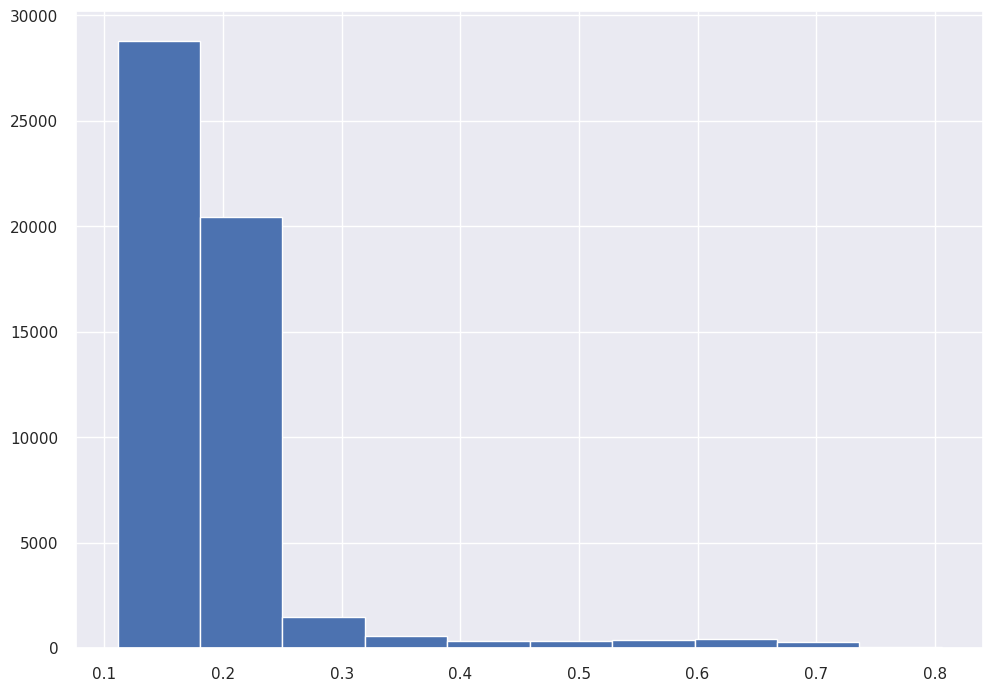

In [0]:
plt.hist(all_stars['PMemb'])